## **캘리포니아 주택 가격 예측하기**

### 1.데이터 로드하고 전처리하기
- 라이브러리 가져오기

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

- 데이터 로드하기

In [2]:
housing = fetch_california_housing()

In [3]:
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [4]:
X = housing.data
y = housing.target

- 학습용/검증용/테스트 데이터셋 분리하기

In [5]:
# 전체 데이터 => 학습용/테스트용 데이터로 분리하기 (random_state=42 지정)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape)

# 학습용 데이터 => 학습용/검증용 데이터로 분리하기(random_state=42 지정)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)
print(X_train.shape, X_valid.shape, y_train.shape, y_valid.shape)

(16512, 8) (4128, 8) (16512,) (4128,)
(13209, 8) (3303, 8) (13209,) (3303,)


- 데이터 전처리하기 - 스케일링하기
    - fit() 단계: 데이터의 각 특성(컬럼)에 대한 평균(mean)과 표준편차(standard deviation)를 계산해요. 이런 통계치는 데이터를 스케일링할 때 사용.
    - transform() 단계: fit()에서 계산한 평균과 표준편차를 사용해 데이터를 변환. 구체적으로, 각 특성의 값에서 평균을 빼고 그 결과를 표준편차로 나눠줌으로써 데이터를 스케일링. 이 메서드는 학습 데이터에 대해 사용. 학습 데이터를 기준으로 데이터셋의 스케일을 조정하는 통계치를 계산하고, 이를 바탕으로 학습/검증/테스트 데이터셋을 변환.

In [6]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

- 랜덤 씨드 설정하기

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

### 2.모델 구성하고 학습하기

- 모델 구성하기

In [8]:
# input_shape 선언하고
# 2개의 은닉층과 각 은닉층은 30개의 노드로 구성된 회귀 모델을 구성합니다.

# input_shape = (8,)
input_shape = (X_train.shape[1],)
model = keras.models.Sequential([
    tf.keras.layers.Input(shape=input_shape),     # 확장성이 좋은 코드
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 32)                992       
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


- 모델 컴파일하기

In [10]:
# loss = "mean_squared_error", optimizer = 'SGD(learning_rate=1e-3)'로 지정
model.compile(optimizer='SGD', loss='mse', metrics=['MSE'])      # ... 코드 입력

- 모델 학습하기

In [11]:
# 학습 데이터, epochs = 20, 검증용 데이터 지정하여 학습한 후 결과를 history에 저장하기
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
413/413 [==============================] - 1s 2ms/step - loss: 1.0846 - MSE: 1.0846 - val_loss: 288.2638 - val_MSE: 288.2638
Epoch 2/20
413/413 [==============================] - 1s 2ms/step - loss: nan - MSE: nan - val_loss: nan - val_MSE: nan
Epoch 3/20
413/413 [==============================] - 1s 2ms/step - loss: nan - MSE: nan - val_loss: nan - val_MSE: nan
Epoch 4/20
413/413 [==============================] - 1s 2ms/step - loss: nan - MSE: nan - val_loss: nan - val_MSE: nan
Epoch 5/20
413/413 [==============================] - 1s 2ms/step - loss: nan - MSE: nan - val_loss: nan - val_MSE: nan
Epoch 6/20
413/413 [==============================] - 1s 2ms/step - loss: nan - MSE: nan - val_loss: nan - val_MSE: nan
Epoch 7/20
413/413 [==============================] - 1s 2ms/step - loss: nan - MSE: nan - val_loss: nan - val_MSE: nan
Epoch 8/20
413/413 [==============================] - 1s 2ms/step - loss: nan - MSE: nan - val_loss: nan - val_MSE: nan
Epoch 9/20
413/413 [====

### 3.모델 평가하고 예측하기

In [12]:
# 테스트 데이터로 평가하기
mse_test = model.evaluate(X_test, y_test)

# 테스트 데이터로 예측하기
X_new = X_test[:3]
y_pred = model.predict(X_test)
y_pred

129/129 [==============================] - 0s 907us/step


array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

### 4.학습 과정 살펴보기

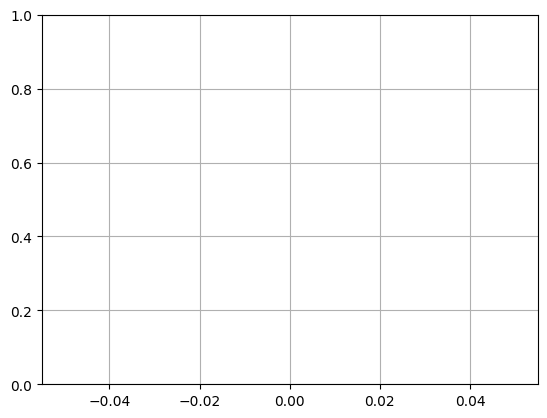

In [13]:
# 방법1
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# 학습과정 나타내기 방법2
fig , ax = plt.subplots(1,2)
train_acc = history.history['MSE']
train_loss = history.history['loss']
val_acc = history.history['val_MSE']
val_loss = history.history['val_loss']
fig.set_size_inches(15,7)

epochs = range(1, len(train_acc) + 1)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training MSE')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation MSE')
ax[0].set_title('Training & Validation MSE')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("MSE")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing & Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

### 5.저장 및 불러오기

In [ ]:
# 모델 구성하기
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [ ]:
# 모델 컴파일하기 : optimizer='sgd', loss='mean_squared_error', metrics=['accuracy']
model.compile(loss=...  # ... 코드 입력

# 모델 학습하기
history = ...         # ... 코드 입력

# 모델 평가하기
mse_test = ...         # ... 코드 입력

# 모델 예측하기
model.predict(X_new)

- 모델 저장하고 불러우고

In [ ]:
#model.save("my_keras_model.h5")
#model = keras.models.load_model("my_keras_model.h5")

model.save("my_keras_model.keras")

model = keras.models.load_model("my_keras_model.keras")

### 6.훈련과정에서 콜백 사용하기

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

- 모델 구성하기

In [ ]:
model2 = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

- 모델 컴파일하기

In [ ]:
model2.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])

In [ ]:

# 체크 포인트 저장하기
early_stop = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
# 조기 종료하기
check_point = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

# 콜백 적용하여 학습하기
history = model2.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[check_point, early_stop])